In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import IPython.display as ipd

from envelope_draft import Envelope

## Notes
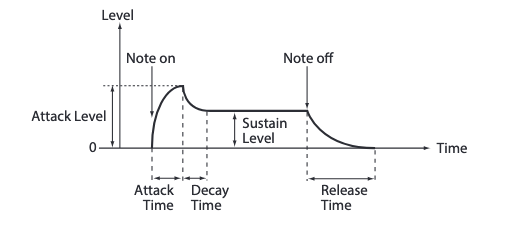


* **attack** 
    * the time taken for initial run-up of level from nil to peak, beginning when the key is pressed.
* **decay** 
    * the time taken for the subsequent run down from the attack level to the designated sustain level.
* **sustain** 
    * the level during the main sequence of the sound's duration, until the key is released.
* **release** 
    * the time taken for the level to decay from the sustain level to zero after the key is released
    
    
--- 
https://python.plainenglish.io/build-your-own-python-synthesizer-part-2-66396f6dad81

From here, I am aiming to create a method: `generate_envelope_signal()`.

This should accept an input signal and will use the Envelope class that's already instantiated, e.g.

```
sine = np.sin(...)
E = Envelope(...)
envelope_for_signal = E.generate_envelope_signal(sine)
sine *= envelope_for_signal
```

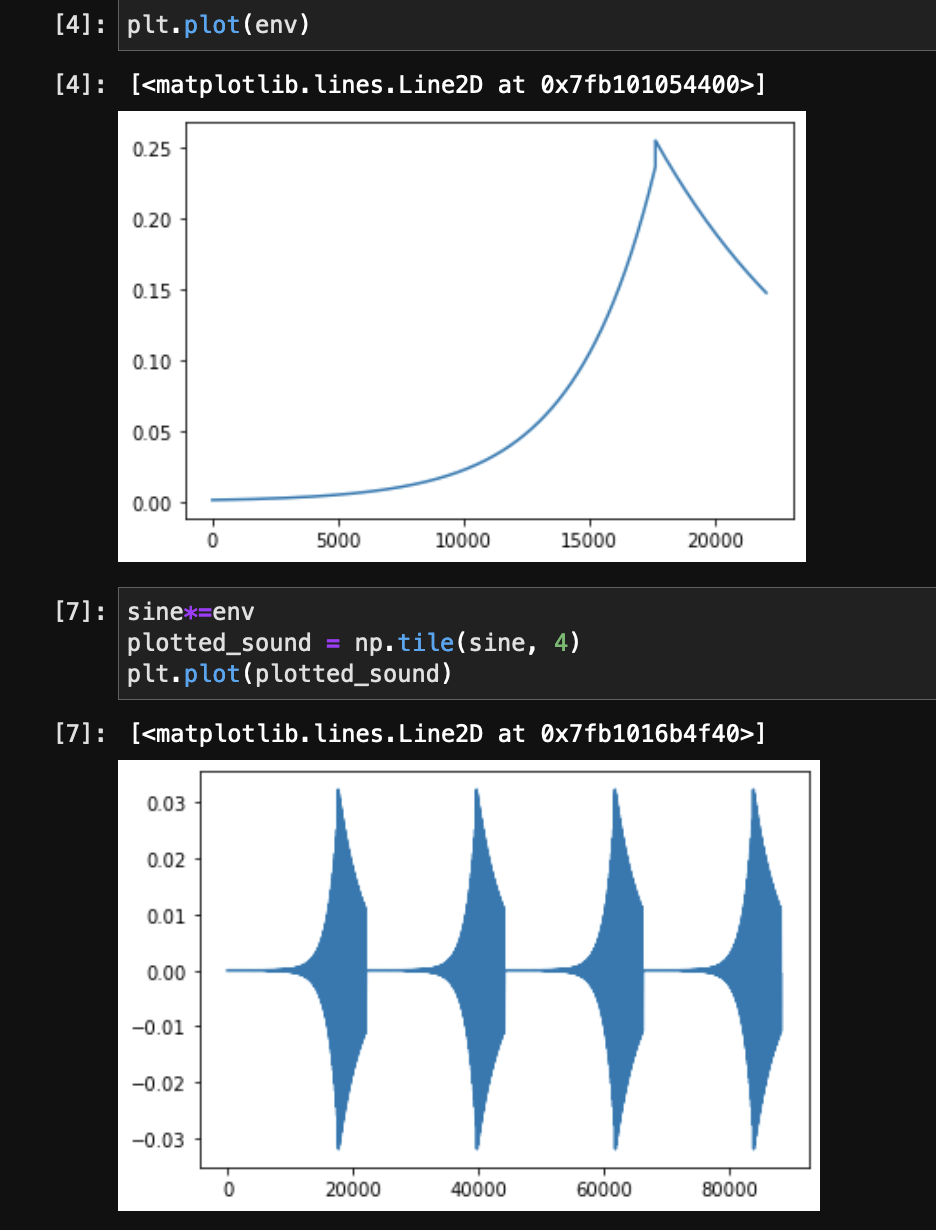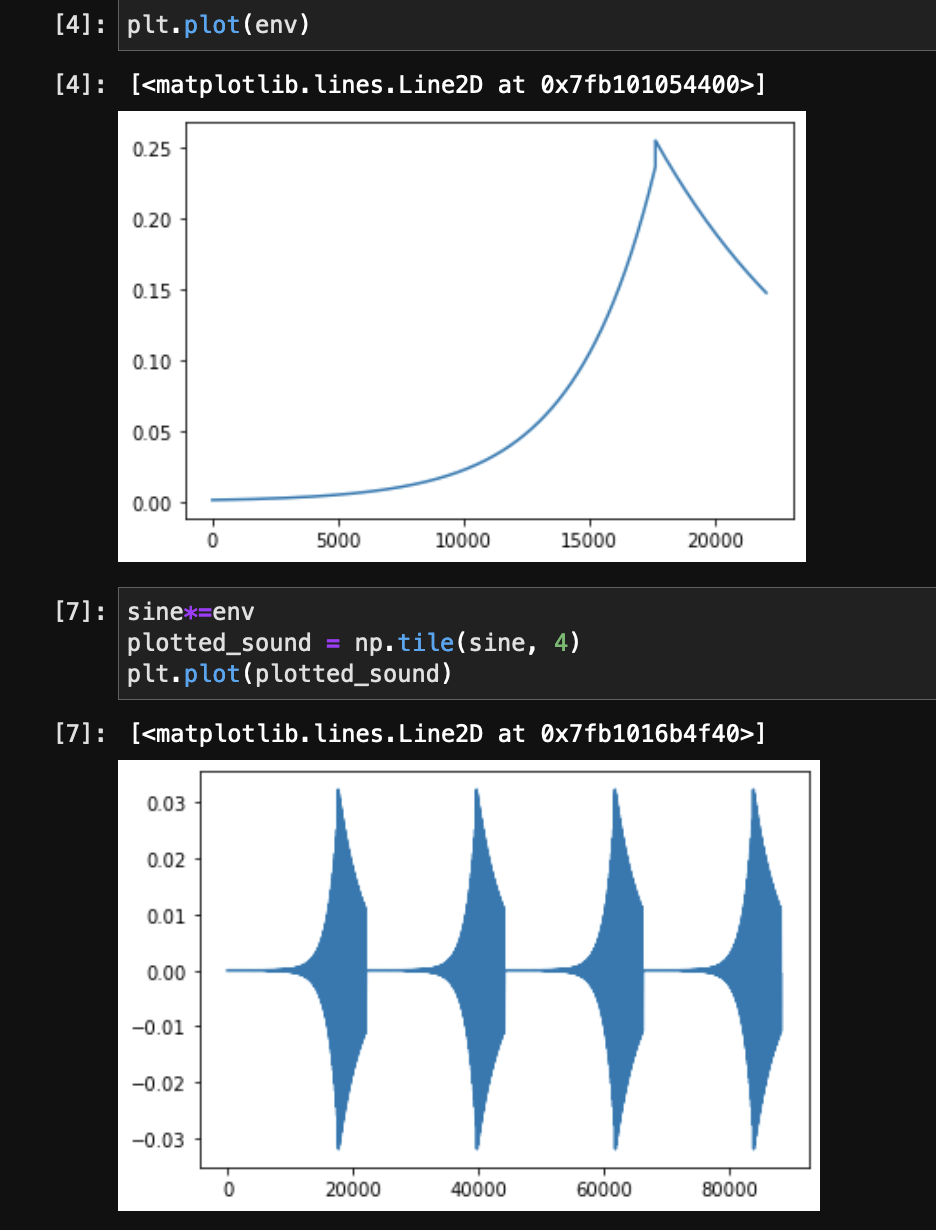

The above is what I was initially thinking would be the solution: the release would simply pick up where the attack leaves off, but this - again - leads to amplitude spikes, causing pops / clicks. I should simply adjust the release to drop to 0 by the end of the sound. Do not worry about letting the sound bleed into the next note -- this might be something for the future, but do not let it distract. It's ok if something about this synthesizer is not "realistic". 

In other words, the user-defined release point should supercede the actual release. 

---

* call parameter for input something like input_signal (not sine or tone)
* precalculate the **full** range of A, D, S, and R for all instances of the Envelope; that way each note can access that same information without having to redo it each time
    * ok, so I think I should have the Envelope class create the basics with Synthesis doing the work to ensure it aligns with each specific note 
    
---
`June 11, 2022`

I'm going to use linspace but square the results so I can have 0. edit: I can't square the results because, when squared, values less than 1 become smaller. duh

```
fig, ax = plt.subplots(1,3, figsize=(16,12))
fig.tight_layout

geometric_arr = np.geomspace(0.001,1,num=100)
linear_arr = np.linspace(0,1,num=100)
linear_arr_sq = linear_arr**2 
ax[0].plot(geometric_arr)
ax[1].plot(linear_arr)
ax[2].plot(linear_arr_sq)

ax[0].set_title('geometric')
ax[1].set_title('linear')
ax[2].set_title('linear squared')
plt.show()
```
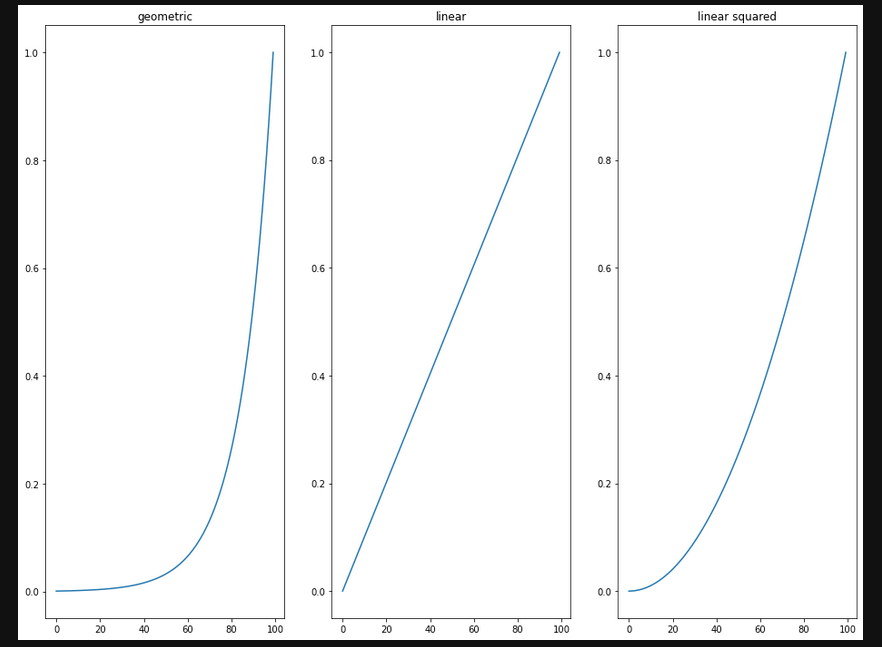

In [77]:
frequency = np.random.randint(100,400)
amplitude = 0.5
duration = np.random.randint(250,2000) / 1000
# duration = 1
sample_rate = 22050
each_sample = np.arange(int(duration*sample_rate))
sine = np.sin(2 * np.pi * each_sample * frequency / sample_rate) * amplitude

attack = np.random.randint(1,100)
decay = np.random.randint(1,100)
sustain = np.random.randint(1,100)
release = np.random.randint(1,100)
# print(f' {attack=}\n {decay=}\n {sustain=}\n {release=}\n\n {duration=}')

# E = Envelope(
#     sine,
#     sample_rate,
#     attack_setting=attack,
#     decay_setting=decay,
#     sustain_setting=sustain,
#     release_setting=release
# )

E = Envelope(
    sine,
    sample_rate,
    attack_setting=10,
    decay_setting=25,
    sustain_setting=25,
    release_setting=25
)

In [78]:
env = E.generate_envelope_signal(sine)

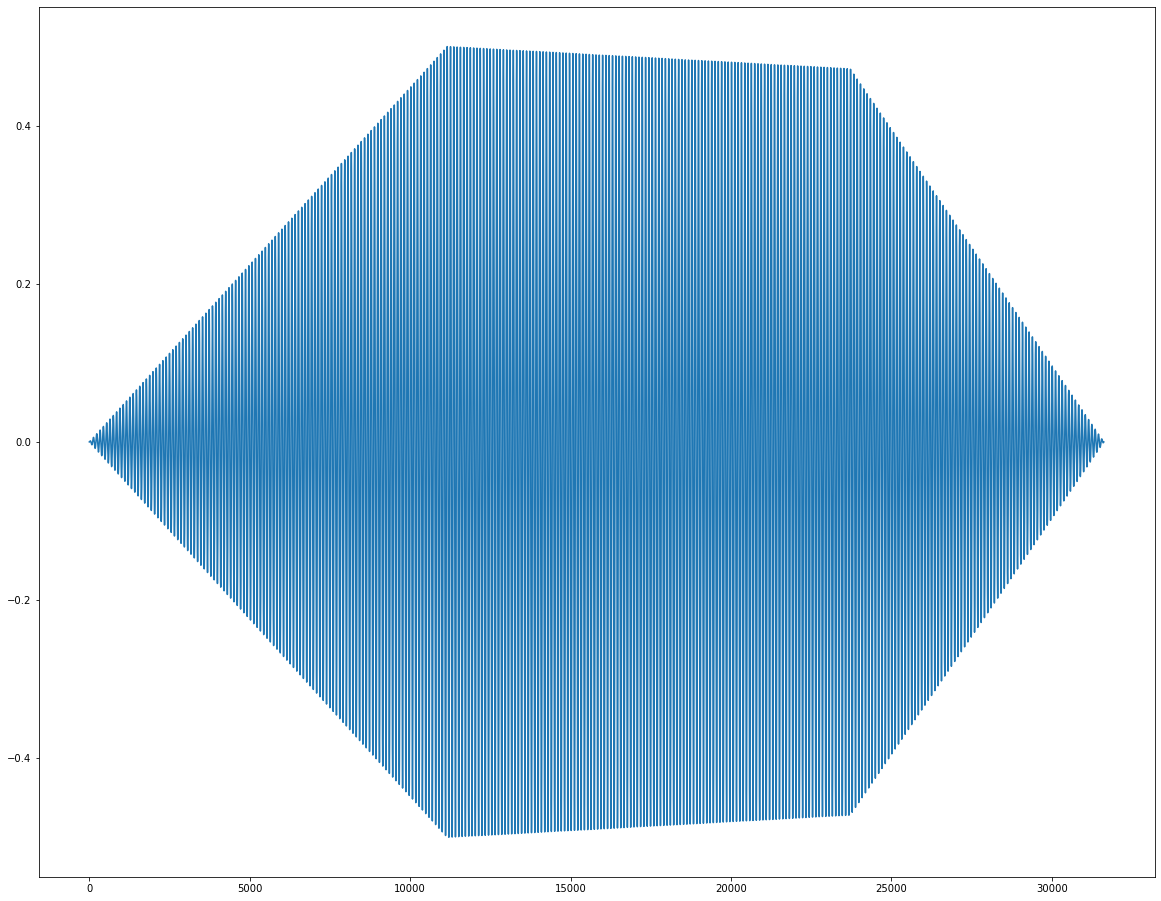

In [79]:
sine*=env

plotted_sound = np.tile(sine, 4)
plt.figure(figsize=(20,16))
plt.plot(sine)

In [80]:
ipd.Audio(plotted_sound, rate=sample_rate)